In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
df= pd.read_csv(r'C:\Users\peravit2\Desktop\BADS7201 ML\project_voice\voice.csv')

In [3]:
df.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male


In [4]:
df.isnull().any().any()

False

In [5]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [8]:
label = pd.get_dummies(df['label'], drop_first=True)

In [9]:
df.drop(['label'], axis=1, inplace=True)

In [10]:
df = pd.concat([df, label], axis=1)

In [11]:
df.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1


In [12]:
df['male'].unique()  ##male = 1

array([1, 0], dtype=uint64)

In [13]:
df.rename(columns={'male': 'gender'}, inplace=True)

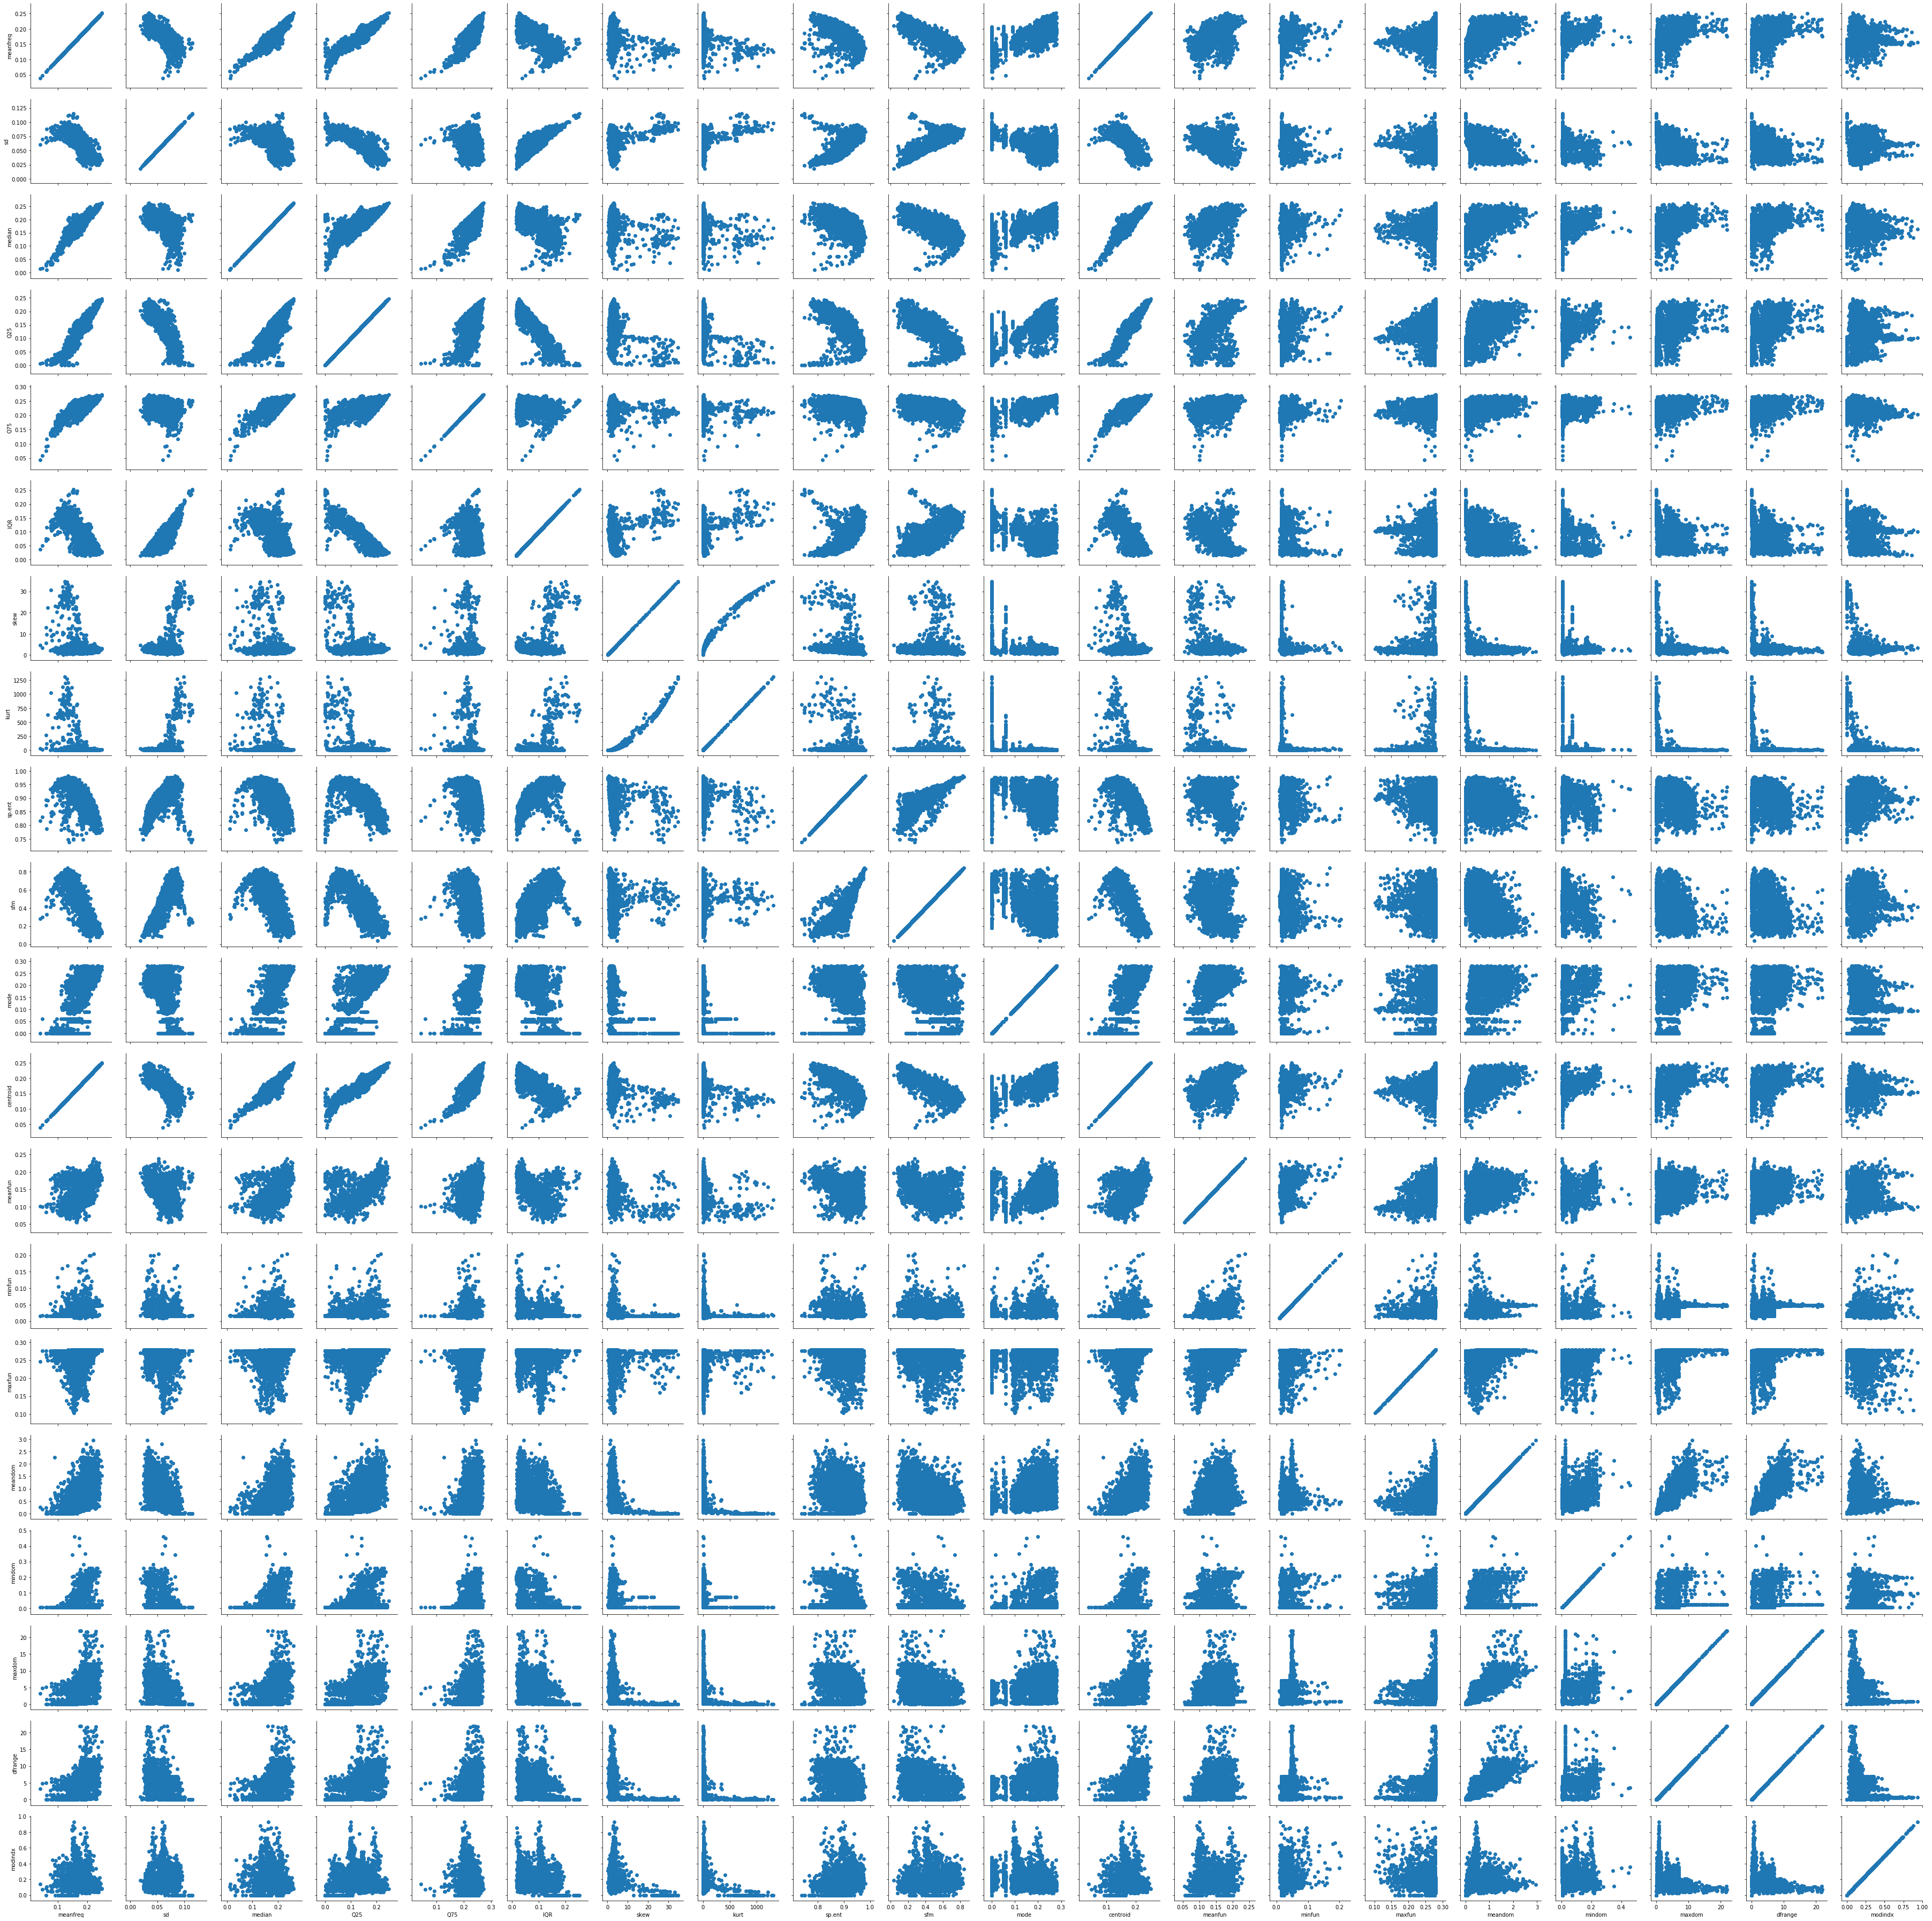

In [10]:
g = sns.PairGrid(df)
g.map(plt.scatter)

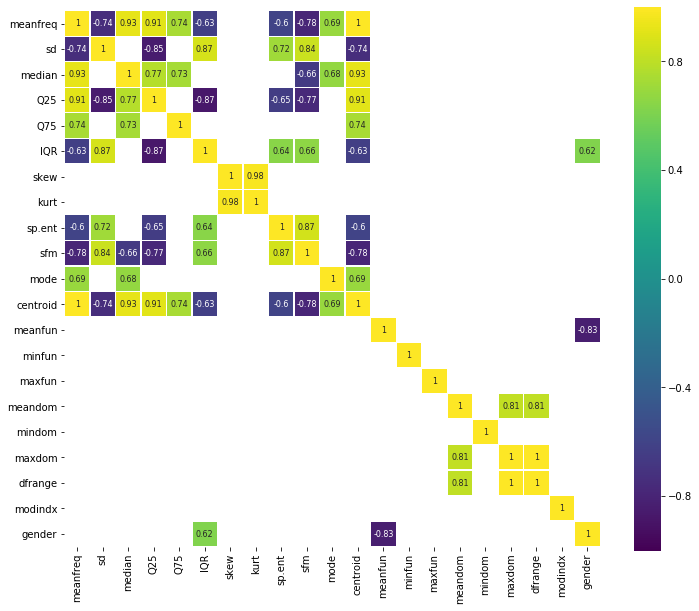

In [81]:
#corr = df.drop('gender', axis=1).corr() # We already examined SalePrice correlations
corr=df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.6)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [82]:
df.shape

(3168, 21)

In [14]:
X=df.iloc[:,0:20]
y=df.iloc[:,20]

In [18]:
X=df[['IQR','meanfun']]
y=df.iloc[:,20]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM

In [97]:
C = 0.1
clf = svm.SVC(kernel='poly', gamma=0.7, C=C)
clf.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

Average Accuracy: 	 0.9276
Accuracy SD: 		 0.01602


In [99]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=10, n_jobs=-1)

In [100]:
confusion_matrix(y_train, y_train_pred)

array([[1015,  163],
       [   9, 1189]], dtype=int64)

In [101]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1178
           1       0.88      0.99      0.93      1198

    accuracy                           0.93      2376
   macro avg       0.94      0.93      0.93      2376
weighted avg       0.93      0.93      0.93      2376



In [102]:
y_test_pred = clf.predict(X_test)

In [103]:
confusion_matrix(y_test, y_test_pred)

array([[351,  55],
       [  4, 382]], dtype=int64)

In [104]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       406
           1       0.87      0.99      0.93       386

    accuracy                           0.93       792
   macro avg       0.93      0.93      0.93       792
weighted avg       0.93      0.93      0.93       792



# SGDclassifier

In [105]:
from sklearn.linear_model import SGDClassifier

In [106]:
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [107]:
res = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

Average Accuracy: 	 0.9587
Accuracy SD: 		 0.009771


In [108]:
y_pred = sgd_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[391,  15],
       [  7, 379]], dtype=int64)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       406
           1       0.96      0.98      0.97       386

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



# RandomForest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
def print_score(clf, X, y, cv=0):
    
    y_pred = clf.predict(X)
    acc_score = accuracy_score(y, y_pred)
    clf_report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
                 
    print(f"Results:\n")
    print(f"accuracy score: {acc_score:.4f}\n")
    print(f"Classification Report: \n {clf_report}\n")
    print(f"Confusion Matrix: \n {conf_matrix}\n")

    if cv > 1:
        res = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
        print(f"Average Accuracy: \t {np.mean(res):.4f}")
        print(f"Accuracy SD: \t\t {np.std(res):.4f}")
        

In [113]:
rf_clf = RandomForestClassifier(random_state=42)

In [114]:
rf_clf.fit(X_train, y_train)

C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [115]:
print_score(rf_clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.9962

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1178
           1       1.00      0.99      1.00      1198

    accuracy                           1.00      2376
   macro avg       1.00      1.00      1.00      2376
weighted avg       1.00      1.00      1.00      2376


Confusion Matrix: 
 [[1176    2]
 [   7 1191]]

Average Accuracy: 	 0.9672
Accuracy SD: 		 0.0112


In [116]:
print_score(rf_clf, X_test, y_test)

Results:

accuracy score: 0.9634

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       406
           1       0.97      0.96      0.96       386

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792


Confusion Matrix: 
 [[393  13]
 [ 16 370]]



In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
rf_clf = RandomForestClassifier(random_state=18)

In [119]:
params_grid = {"max_depth": [3, 4, 5, None],
               "min_samples_split": [2, 3, 5, 10],
               "min_samples_leaf": [1, 3, 5, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [156]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=50,
                           verbose=1, scoring='accuracy')

In [157]:
grid_search.fit(X_train, y_train)

Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 4044 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 7544 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 12044 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   40.3s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=50, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [158]:
grid_search.best_score_

0.9713804713804713

In [159]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [160]:
print_score(grid_search, X_train, y_train, cv=10)

Results:

accuracy score: 0.9701

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1178
           1       0.96      0.98      0.97      1198

    accuracy                           0.97      2376
   macro avg       0.97      0.97      0.97      2376
weighted avg       0.97      0.97      0.97      2376


Confusion Matrix: 
 [[1132   46]
 [  25 1173]]

Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 4044 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 7544 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 12044 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   39.3s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 4044 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 7544 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 12044 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   42.4s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 9048 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   41.1s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 4044 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 7544 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 12044 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   41.3s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent wor

Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 9048 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   40.0s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 9048 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   40.0s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 9048 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   39.7s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 9048 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   39.7s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 9048 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   40.5s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 50 folds for each of 256 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2152 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 5652 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 10552 tasks      | elapsed:   31.5s


Average Accuracy: 	 0.9684
Accuracy SD: 		 0.0104


[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   39.6s finished
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [162]:
print_score(grid_search, X_test, y_test)

Results:

accuracy score: 0.9697

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       406
           1       0.96      0.98      0.97       386

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792


Confusion Matrix: 
 [[390  16]
 [  8 378]]



# XGBoost

In [163]:
import xgboost as xgb

In [164]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [165]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [129]:
print_score(xgb_clf, X_train, y_train, cv=10)

Results:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1178
           1       1.00      1.00      1.00      1198

    accuracy                           1.00      2376
   macro avg       1.00      1.00      1.00      2376
weighted avg       1.00      1.00      1.00      2376


Confusion Matrix: 
 [[1178    0]
 [   0 1198]]

Average Accuracy: 	 0.9646
Accuracy SD: 		 0.0125


In [130]:
print_score(xgb_clf, X_test, y_test)

Results:

accuracy score: 0.9583

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       406
           1       0.95      0.96      0.96       386

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792


Confusion Matrix: 
 [[388  18]
 [ 15 371]]



# Voting

In [131]:
svm_clf = svm.SVC(kernel='poly', gamma=0.1, C=0.1)
lr_clf = SGDClassifier(loss='log')
rf_clf = RandomForestClassifier()

In [132]:
res = cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

Average Accuracy: 	 0.9621
Accuracy SD: 		 0.008119


In [133]:
y_train_pred = cross_val_predict(lr_clf, X_train, y_train, cv=5, n_jobs=-1)

In [134]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1178
           1       0.96      0.96      0.96      1198

    accuracy                           0.96      2376
   macro avg       0.96      0.96      0.96      2376
weighted avg       0.96      0.96      0.96      2376



In [135]:
res = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

Average Accuracy: 	 0.9688
Accuracy SD: 		 0.01181


In [136]:
y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5, n_jobs=-1)

In [137]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1178
           1       0.98      0.96      0.97      1198

    accuracy                           0.97      2376
   macro avg       0.97      0.97      0.97      2376
weighted avg       0.97      0.97      0.97      2376



In [138]:
res = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

Average Accuracy: 	 0.8173
Accuracy SD: 		 0.01272


In [139]:
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=5, n_jobs=-1)

In [140]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      1178
           1       0.73      1.00      0.85      1198

    accuracy                           0.82      2376
   macro avg       0.87      0.82      0.81      2376
weighted avg       0.86      0.82      0.81      2376



In [141]:
print(confusion_matrix(y_train, y_train_pred))

[[ 746  432]
 [   2 1196]]


In [142]:
svm_clf = svm.SVC(kernel='poly', gamma=0.1, C=0.1)
lr_clf = SGDClassifier(loss='log')
rf_clf = RandomForestClassifier()

In [143]:
voting_clf = VotingClassifier(
                estimators=[('lr', lr_clf), ('rf', rf_clf), ('svc', svm_clf)],
                voting='hard' )

In [144]:
voting_clf.fit(X_train, y_train)

C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l2',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            w...
                                                     n_jobs=None,
                                             

In [145]:
res = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

Average Accuracy: 	 0.9646
Accuracy SD: 		 0.005247


In [146]:
y_train_pred = cross_val_predict(voting_clf, X_train, y_train, cv=5, n_jobs=-1)

In [147]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1178
           1       0.95      0.97      0.96      1198

    accuracy                           0.96      2376
   macro avg       0.96      0.96      0.96      2376
weighted avg       0.96      0.96      0.96      2376



In [148]:
print(confusion_matrix(y_train, y_train_pred))

[[1111   67]
 [  30 1168]]


In [149]:
y_test_pred = voting_clf.predict(X_test)

In [150]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       406
           1       0.95      0.98      0.97       386

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



In [151]:
print(confusion_matrix(y_test, y_test_pred))

[[387  19]
 [  7 379]]


In [25]:
## Automate Stacking In Python

In [26]:
##https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [22]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [23]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.96969697]
    fold  1:  [0.96127946]
    fold  2:  [0.96127946]
    fold  3:  [0.95959596]
    ----
    MEAN:     [0.96296296] + [0.00394816]
    FULL:     [0.96296296]

model  1:     [RandomForestClassifier]
    fold  0:  [0.96464646]
    fold  1:  [0.96127946]
    fold  2:  [0.97643098]
    fold  3:  [0.96464646]
    ----
    MEAN:     [0.96675084] + [0.00575538]
    FULL:     [0.96675084]

model  2:     [XGBClassifier]
    fold  0:  [0.96632997]
    fold  1:  [0.96296296]
    fold  2:  [0.96801347]
    fold  3:  [0.96464646]
    ----
    MEAN:     [0.96548822] + [0.00188221]
    FULL:     [0.96548822]



In [24]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.98358586]


In [28]:
print(confusion_matrix(y_test, y_pred))

[[364   4]
 [  9 415]]
